In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/yolov3/dataset.zip"

In [3]:
with open('/content/predict.txt') as f:
  TEST_IMAGES = f.read().splitlines()

In [4]:
TEST_IMAGES

['dataset/images/crowd_mask66.jpg',
 'dataset/images/new_201.jpg',
 'dataset/images/194.jpg',
 'dataset/images/asian_mask37.jpg',
 'dataset/images/crowd_mask101.jpg',
 'dataset/images/new_57.jpg',
 'dataset/images/new_105.jpg',
 'dataset/images/24.jpg',
 'dataset/images/asian_mask289.jpg',
 'dataset/images/new_145.jpg',
 'dataset/images/167.jpg',
 'dataset/images/109.jpg',
 'dataset/images/asian_mask174.jpg',
 'dataset/images/crowd_mask19.jpg',
 'dataset/images/new_114.jpg',
 'dataset/images/60.jpg',
 'dataset/images/asian_mask224.jpg',
 'dataset/images/asian_mask142.jpg',
 'dataset/images/74.jpg',
 'dataset/images/72.jpg',
 'dataset/images/asian_mask103.jpg',
 'dataset/images/new_48.jpg',
 'dataset/images/new_245.jpg',
 'dataset/images/asian_mask128.jpg',
 'dataset/images/44.jpg',
 'dataset/images/157.jpg',
 'dataset/images/new_130.jpg',
 'dataset/images/new_50.jpg',
 'dataset/images/asian_mask298.jpg',
 'dataset/images/new_255.jpg',
 'dataset/images/117.jpg',
 'dataset/images/asian_m

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the Model
net = cv2.dnn.readNet('/content/drive/MyDrive/yolov3/yolov3_training_last.weights','/content/yolov3_test.cfg')

# Loading the Classes
classes = []
with open('/content/classes.names', 'r') as f:
    classes = f.read().splitlines()

In [6]:
classes

['Mask', 'Without_mask']

In [13]:
def detect(image):
  # Loading the Image
  img = cv2.imread(image)
  height, width, _ = img.shape

  # Creating Blob of Image to Feed to Network
  blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)

  # After Normalization
  # Input to model
  net.setInput(blob)

  # To Make Detections and get bounded boxes and get classes names
  output_layers_names = net.getUnconnectedOutLayersNames()
  layerOutputs = net.forward(output_layers_names)

  # Extract the bounding boxes
  boxes = []
  confidences = []
  class_ids = []
  for output in layerOutputs:
      for detection in output:
          # To get highest score of class
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.5:
              center_x = int(detection[0]*width)
              center_y = int(detection[1]*height)
              w = int(detection[2]*width)
              h = int(detection[3]*height)

              # To get Upper corners of bounding boxes
              x = int(center_x - w/2)
              y = int(center_y - h/2)

              boxes.append([x, y, w, h])
              confidences.append((float(confidence)))
              class_ids.append(class_id)


  # in the case if we have more than bounding boxes for a single object then we want to select bounding box having highest confidence using this function
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, .5, .4)

  font = cv2.FONT_HERSHEY_PLAIN
  # To get random color values to make more beautiful
  colors = np.random.uniform(0, 255, size=(len(boxes), 3))

  if len(indexes) > 0:
      # iterate over all boxes found
      for i in indexes.flatten():
          # getting postion of bounding boxes
          x, y, w, h = boxes[i]
          # get label name from classes
          label = str(classes[class_ids[i]])
          # getting confidence value
          confidence = str(round(confidences[i], 2))
          # assigning color
          color = colors[i]
          #creating bounding box
          cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
          cv2.rectangle(img, (x, y-40), (x+w, y-2), color, -1)
          #Displaying label class name
          cv2.putText(img, label.capitalize(), (x+4, y-10), font, 1.1, (255, 255, 255), 2)

  cv2_imshow(img)

  # for b in blob:
  #     for n, img_blob in enumerate(b):
  #         cv2.imshow(str(n), img_blob)

In [ ]:
import random
for _ in range(10):
  detect(random.choice(TEST_IMAGES))

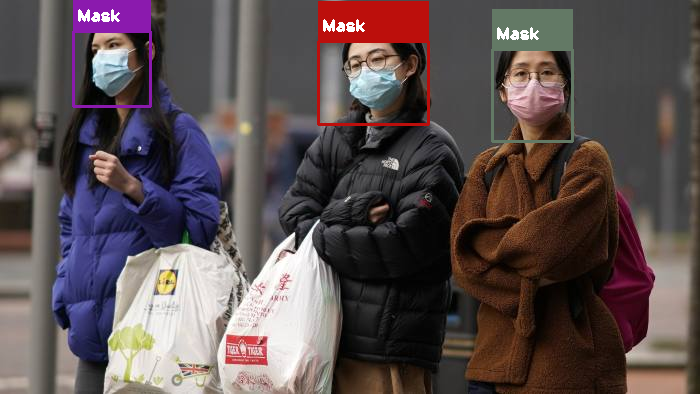

In [14]:
detect("/content/iasfa.jpeg")

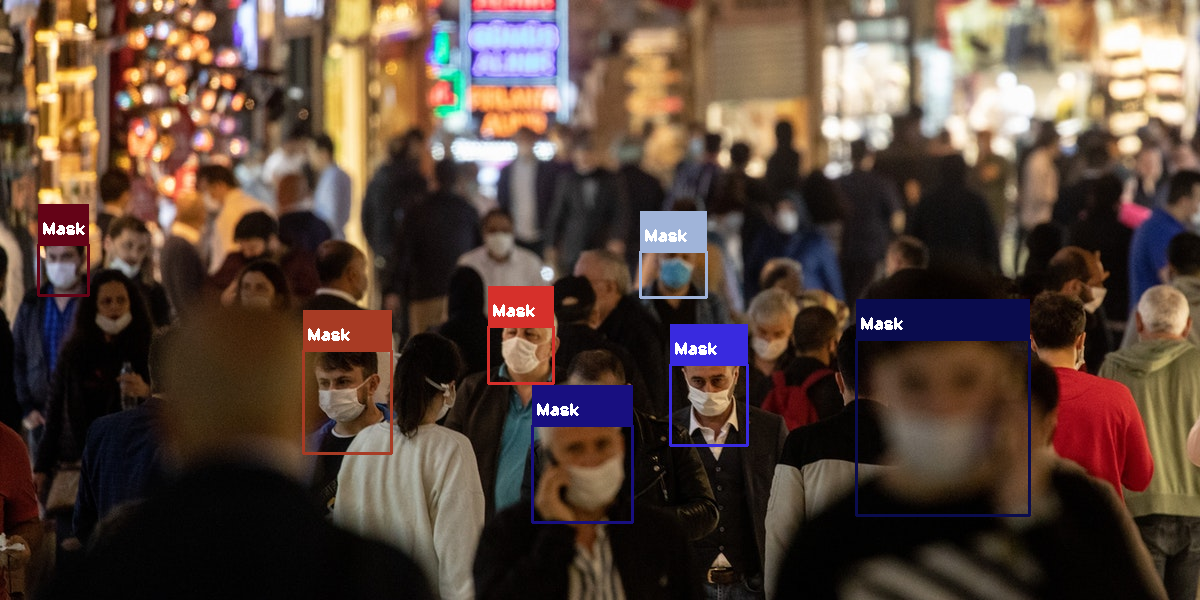

In [10]:
detect('/content/GettyImages-1239699427.jpg')